## METRICAS REGRESIÓN LINEAL

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

En el pair de hoy tendremos que:
- Calcular las métricas para vuestro modelo
- Discutir los resultados de las métricas y extraed conclusiones
- Guardar los resultados de las métricas en un csv para usarlo más adelante.

Probamos con los datos sin estandarizar con el encoding

In [3]:
df = pd.read_csv("../ficheros/diamons_enconding.csv", index_col = 0).reset_index(drop= True) 
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Separamos la variable respuesta y las predictoras
X = df.drop("price", axis = 1)
y = df["price"]

In [5]:
# Dividimos los datos entre entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# iniciamos la regresión lineal.
lr = LinearRegression(n_jobs=-1)

In [7]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
#Es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [9]:
# Convertimos en dataframe las predicciones y las unimos (las de test y las de entrenamiento)
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
31266,880,477.102597,Train
20273,8736,7692.039067,Train
17102,6848,6605.440777,Train
45495,2075,2259.005743,Train
16966,6793,6420.073325,Train


In [10]:
# Creamos una nueva columna con los residuos, la diferencia entre lo real y lo que ha predecido nuestro modelo
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
31266,880,477.102597,Train,402.897403
20273,8736,7692.039067,Train,1043.960933
17102,6848,6605.440777,Train,242.559223
45495,2075,2259.005743,Train,-184.005743
16966,6793,6420.073325,Train,372.926675


Al igual que en el jupyter anterior, vemos que tenemos residuos muy grandes

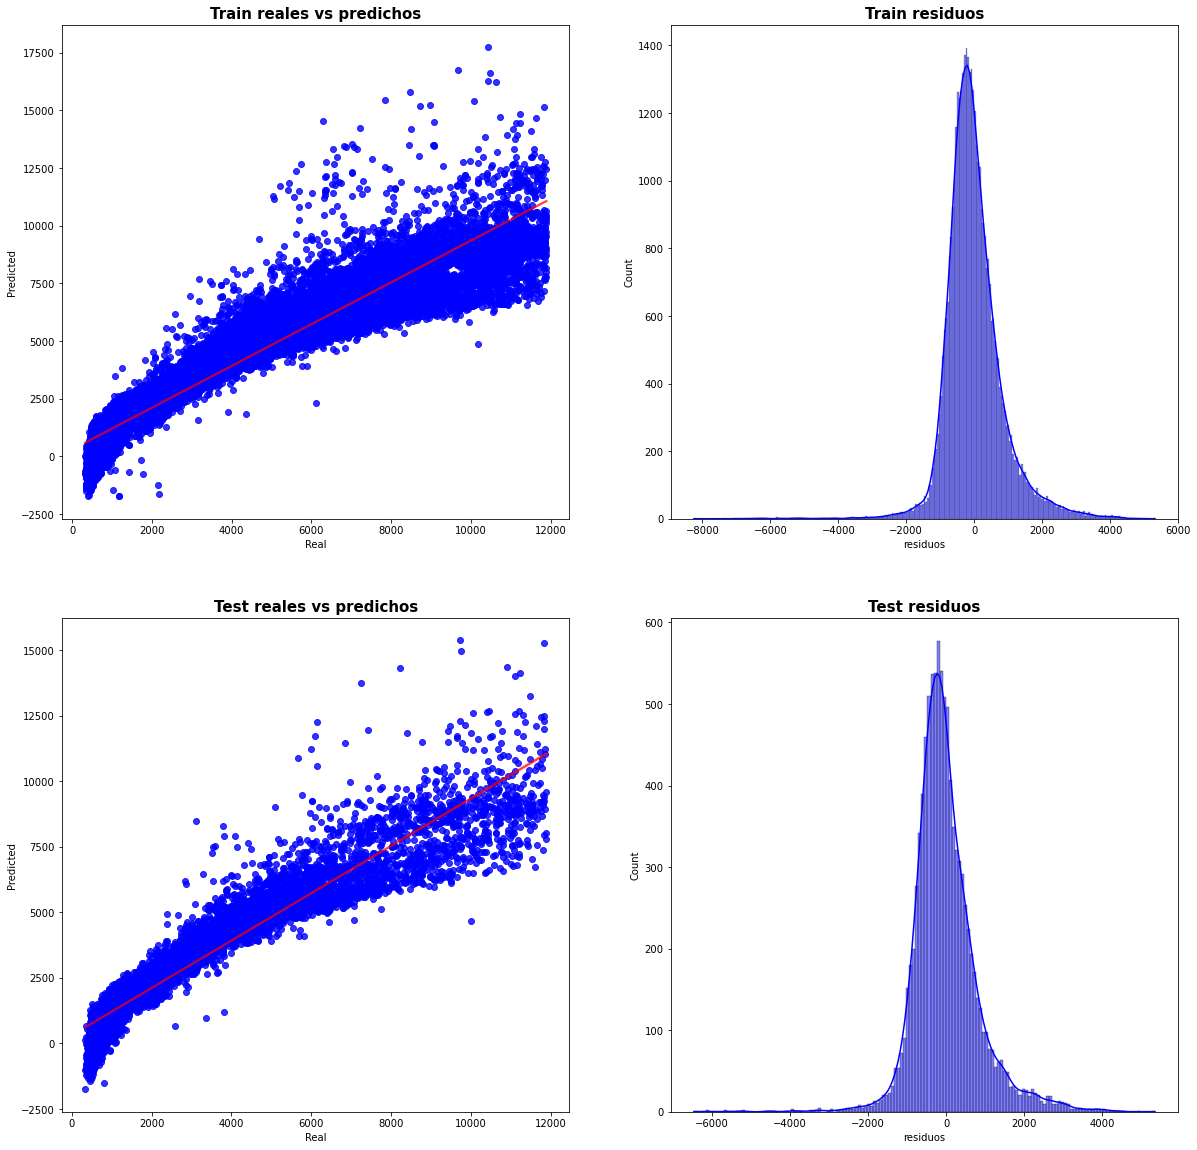

In [11]:
# Hacemos una gráfica para ver la diferencia entre lo real y lo que hemos predecido
fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 })

sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="blue",
             kde=True, 
             ax = ax[0,1])

sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "blue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [12]:
# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9055440051154418
El MAE es 592.6581273092422
El MSE es 722504.4826393581
EL RMSE es  850.0026368425913
Para el conjunto test:---------------
El valor de r2 score es  0.9061201734641039
El MAE es 590.9140627651343
El MSE es 713235.4991300037
EL RMSE es  844.5327105151131


In [14]:
# Lo convertimos en un dataframe para verlo mejor
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion Sin Estand", "Linear Regression Sin Estand"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,590.914063,713235.499130,844.532711,0.906120,test,Linear Regresion Sin Estand
1,592.658127,722504.482639,850.002637,0.905544,train,Linear Regression Sin Estand


Según el R2 del train, nuestro modelo podría predecir el 90% del precio de los diamantes, lo que puede parecer un buen valor.

Sin embargo, con el RMSE podemos ver que hay una diferencia de 850$, lo cual nos parece demasiado. A pesar de que suponemos que será para los precios más altos. El importe máximo que tenemos es de 11.888$, por lo que sería una diferencia del 7,15%, que no sabemos si es bueno o no, pero a nosotras nos parece demasiado.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50242.0,0.722995,0.381567,0.20,0.38,0.70,1.01,2.77
cut,50242.0,2.906373,1.120846,0.00,2.00,3.00,4.00,4.00
color,50242.0,3.453047,1.689767,0.00,2.00,3.00,5.00,6.00
clarity,50242.0,3.078799,1.649553,0.00,2.00,3.00,4.00,7.00
depth,50242.0,61.754333,1.426388,43.00,61.10,61.80,62.50,79.00
table,50242.0,57.422410,2.227616,43.00,56.00,57.00,59.00,79.00
price,50242.0,3159.144222,2763.857194,326.00,911.00,2155.00,4668.00,11888.00
x,50242.0,5.582681,0.991198,3.73,4.67,5.59,6.43,8.93
y,50242.0,5.585400,0.983783,3.68,4.68,5.58,6.42,8.83
z,50242.0,3.448151,0.613879,1.41,2.88,3.43,3.98,5.60


In [30]:
df_resultados.to_csv("../ficheros/resultados_diamond.csv")

Despues de valorar los resultados que hemos obtenido, vamos a probar a eliminar *x*, *y* y *z* para a ver si asi mejoran

In [16]:
df2= df.drop(columns=["x","y","z"], axis = 1) 
df2.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,1,61.5,55.0,326
1,0.21,3,5,2,59.8,61.0,326
2,0.23,1,5,4,56.9,65.0,327
3,0.29,3,1,3,62.4,58.0,334
4,0.31,1,0,1,63.3,58.0,335


In [17]:
X2 = df2.drop("price", axis = 1)
y2 = df2["price"]

In [18]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [20]:
lr2 = LinearRegression(n_jobs=-1)

In [21]:
lr2.fit(x2_train, y2_train)

LinearRegression(n_jobs=-1)

In [22]:
y2_predict_train = lr2.predict(x2_train) 
y2_predict_test = lr2.predict(x2_test)

In [23]:
train_df2 = pd.DataFrame({'Real': y2_train, 'Predicted': y2_predict_train, 'Set': ['Train']*len(y2_train)})
test_df2  = pd.DataFrame({'Real': y2_test,  'Predicted': y2_predict_test,  'Set': ['Test']*len(y2_test)})
resultados2 = pd.concat([train_df2,test_df2], axis = 0)
resultados2.head()

,Real,Predicted,Set
31266,880,438.494453,Train
20273,8736,7790.407671,Train
17102,6848,6542.495183,Train
45495,2075,2332.983763,Train
16966,6793,6392.229329,Train


In [24]:
resultados2['residuos'] = resultados2['Real'] - resultados2['Predicted']
resultados2.head()

,Real,Predicted,Set,residuos
31266,880,438.494453,Train,441.505547
20273,8736,7790.407671,Train,945.592329
17102,6848,6542.495183,Train,305.504817
45495,2075,2332.983763,Train,-257.983763
16966,6793,6392.229329,Train,400.770671


In [25]:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y2_train,y2_predict_train))
print('El MAE es',mean_absolute_error(y2_train,y2_predict_train))
print('El MSE es',mean_squared_error(y2_train,y2_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y2_train,y2_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y2_test,y2_predict_test))
print('El MAE es',mean_absolute_error(y2_test,y2_predict_test))
print('El MSE es',mean_squared_error(y2_test,y2_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y2_test,y2_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.903946762768669
El MAE es 608.3043683184608
El MSE es 734721.9682189134
EL RMSE es  857.1592432091679
Para el conjunto test:---------------
El valor de r2 score es  0.9048722875785076
El MAE es 605.6131770981276
El MSE es 722716.0930479125
EL RMSE es  850.1271040543952


No hay practicamente diferencia con la anterior prueba

Probamos ahora con los datos estandarizados

In [26]:
df3 = pd.read_csv("../ficheros/diamons_estand_enconding.csv", index_col = 0)
df3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-0.746032,4,5,1,-0.214286,-0.666667,326,-0.931818,-0.919540,-0.909091
1,-0.777778,3,5,2,-1.428571,1.333333,326,-0.965909,-1.000000,-1.018182
2,-0.746032,1,5,4,-3.500000,2.666667,327,-0.875000,-0.867816,-1.018182
3,-0.650794,3,1,3,0.428571,0.333333,334,-0.789773,-0.775862,-0.727273
4,-0.619048,1,0,1,1.071429,0.333333,335,-0.710227,-0.706897,-0.618182


In [27]:
X3 = df3.drop("price", axis = 1)
y3 = df3["price"]

In [28]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [29]:
lr3 = LinearRegression(n_jobs=-1)

In [30]:
lr3.fit(x3_train, y3_train)

LinearRegression(n_jobs=-1)

In [31]:
y3_predict_train = lr3.predict(x3_train) 
y3_predict_test = lr3.predict(x3_test)

In [32]:
train_df3 = pd.DataFrame({'Real': y3_train, 'Predicted': y3_predict_train, 'Set': ['Train']*len(y3_train)})
test_df3  = pd.DataFrame({'Real': y3_test,  'Predicted': y3_predict_test,  'Set': ['Test']*len(y3_test)})
resultados3 = pd.concat([train_df3,test_df3], axis = 0)
resultados3.head()

,Real,Predicted,Set
31266,880,477.102597,Train
20273,8736,7692.039067,Train
17102,6848,6605.440777,Train
45495,2075,2259.005743,Train
16966,6793,6420.073325,Train


In [33]:
resultados3['residuos'] = resultados3['Real'] - resultados3['Predicted']
resultados3.head()

,Real,Predicted,Set,residuos
31266,880,477.102597,Train,402.897403
20273,8736,7692.039067,Train,1043.960933
17102,6848,6605.440777,Train,242.559223
45495,2075,2259.005743,Train,-184.005743
16966,6793,6420.073325,Train,372.926675


In [34]:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y3_train,y3_predict_train))
print('El MAE es',mean_absolute_error(y3_train,y3_predict_train))
print('El MSE es',mean_squared_error(y3_train,y3_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y3_train,y3_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y3_test,y3_predict_test))
print('El MAE es',mean_absolute_error(y3_test,y3_predict_test))
print('El MSE es',mean_squared_error(y3_test,y3_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y3_test,y3_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9055440051154418
El MAE es 592.6581273092426
El MSE es 722504.482639358
EL RMSE es  850.0026368425912
Para el conjunto test:---------------
El valor de r2 score es  0.9061201734641039
El MAE es 590.9140627651348
El MSE es 713235.4991300039
EL RMSE es  844.5327105151131


In [35]:
# Lo convertimos en un dataframe para verlo mejor
resultados_metricas3 = {'MAE': [mean_absolute_error(y3_test, y3_predict_test), mean_absolute_error(y3_train, y3_predict_train)],
                'MSE': [mean_squared_error(y3_test, y3_predict_test), mean_squared_error(y3_train, y3_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y3_test, y3_predict_test)), np.sqrt(mean_squared_error(y3_train, y3_predict_train))],
                'R2':  [r2_score(y3_test, y3_predict_test), r2_score(y3_train, y3_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion Estand", "Linear Regression Estand"]}

df_resultados3 = pd.DataFrame(resultados_metricas3)

df_resultados3

,MAE,MSE,RMSE,R2,set,modelo
0,590.914063,713235.499130,844.532711,0.906120,test,Linear Regresion Estand
1,592.658127,722504.482639,850.002637,0.905544,train,Linear Regression Estand


Todas las pruebas realizadas nos dan los mismos resultados:
- R2 alrededor de 0.9, que quiere decir que nuestro modelo puedo explicar un 90% de la variazion del valor de los diamantes
- El resto de los valores RMSE nos parecen un poco alto, ya que es casi el 10 % del precio maximo 